# **Homework 12 - Federico Berto**

In [1]:
# Importing useful libraries
import math
import numpy as np
from numpy import log
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f 
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.api import qqplot
from IPython.display import display, Math
from tabulate import tabulate

## Exercise 12.7.2

We plot by using Python:

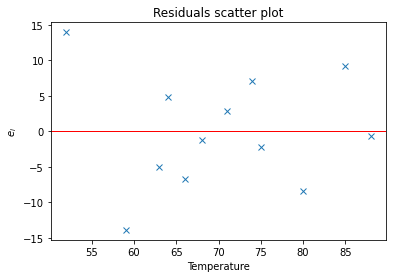

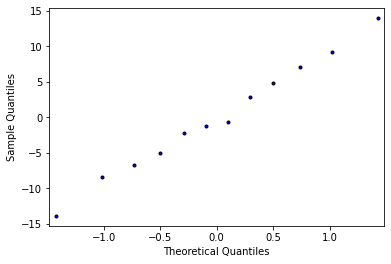

In [2]:
# Data loader
data = pd.read_excel('DS 12.2.2.xls')
x = data.iloc[:, 1].to_numpy() # In this case, the columns are exchanged
y = data.iloc[:, 0].to_numpy()

# Data fitting
fit = ols('y~x', data).fit()
res = fit.resid # Obtain residuals

# Plotting
# fig, ax = plt.figure(figsize=(10, 6))
plt.plot(x, res, 'x')
plt.xlabel(r'Temperature')
plt.ylabel(r'$e_i$')
plt.axhline(linewidth=1, color='r')
plt.title("Residuals scatter plot")
qqplot(res, color='black', markersize=3);

Both the plots of the residuals against the temperature and the normal probability plot do not show any outlier and there is no suggestion that the fitted regression model is not appropriate.

## Exercise 12.7.6

We use Python:

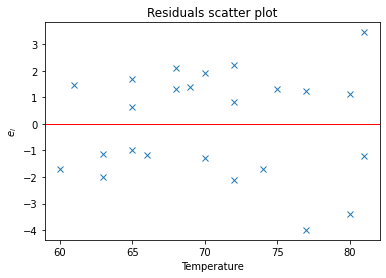

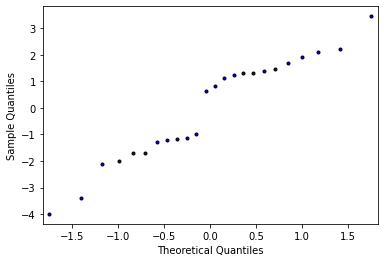

In [3]:
# Data loader
data = pd.read_excel('DS 12.2.6.xls')
x = data.iloc[:, 0].to_numpy()
y = data.iloc[:, 1].to_numpy()

# Data fitting
fit = ols('y~x', data).fit()
res = fit.resid # Obtain residuals

# Plotting
# fig, ax = plt.figure(figsize=(10, 6))
plt.plot(x, res, 'x')
plt.xlabel(r'Temperature')
plt.ylabel(r'$e_i$')
plt.axhline(linewidth=1, color='r')
plt.title("Residuals scatter plot")
qqplot(res, color='black', markersize=3);

Higher temperature resistances higher residuals in absolute values; these outliers actually suggest that, also by looking at the normal probability plot, there could be a small increase in the variability of resistance values.

## Exercise 12.8.4

We want to show that $P = \gamma_0 A^{\gamma_1}$ provides a good fit to the data set. We can rewrite the model as:
$$ln(P) = ln \gamma_0 + \gamma_1 ln A$$
We make suitable transformations by Python:

   Pressure Differential  Cross-Sectional Area
0                      2                  0.50
1                      4                  0.54
2                      7                  0.57
3                     11                  0.65
4                     13                  0.69
5                     21                  0.73
6                     32                  0.78
7                     48                  0.85
8                     64                  0.97
9                     91                  1.04


Text(0.5, 1.0, 'Scatter plot of the transformed data')

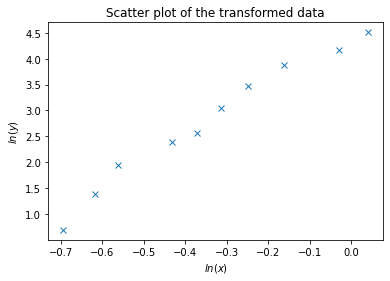

In [4]:

# Data loader
data = pd.read_excel('DS 12.8.4.xls')
x = data.iloc[:, 1].to_numpy() # Columns are changed
y = data.iloc[:, 0].to_numpy()

# We transform the data via a log transformation
x = log(x)
y = log(y)

print(data)
# Plot for showing the transformed data
plt.plot(x, y, 'x')
plt.xlabel(r'$ln(x)$')
plt.ylabel(r'$ln(y)$')
plt.title('Scatter plot of the transformed data')

a) As we can see from the plot, the model seems to provide a good fit to the data set.

b) We now fit the data to obtain the parameters:

In [5]:
# Data fitting
fit = ols('y~x', data).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     304.7
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.18e-07
Time:                        15:08:08   Log-Likelihood:                 2.5270
No. Observations:                  10   AIC:                            -1.054
Df Residuals:                       8   BIC:                           -0.4488
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4967      0.118     38.253      0.0

/home/fedebotu/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In this case, $\beta_0 = ln(\gamma_0) = 4.4967$, so:
$$\gamma_0 = e^{4.4967} = 89.72$$
While $\beta_1 = \gamma_1 = 4.9931$ so:
$$\gamma_1 = 4.9931$$

c) We can obtain the 95% confidence interval from the built-in function:

In [6]:
print(fit.conf_int())

                  0         1
Intercept  4.225643  4.767790
x          4.333523  5.652685


We adjust the intercept result with with:
$$lower = e^{4.225643} = 68.418$$
$$upper = e^{4.767790} = 117.659$$
Therefore, the confidence intervals will be:
$$\gamma_0 \in (68.418, 117.659)$$
$$\gamma_1 \in (4.333, 5.652)$$

## Exercise 12.8.6

We have the following model:
$$e^{y/\gamma_0} = \gamma_1/x^2$$
If we apply the logarithm, we get:
$$\frac{y}{\gamma_0} = ln(\frac{\gamma_1}{x^2})$$
$$\Longrightarrow y = \gamma_0ln(\gamma_1) - 2\gamma_0ln(x)$$

If we apply the linear regression, we get:
$$\hat{\beta}_0 = \hat{\gamma}_0 ln(\hat{\gamma}_1)$$
$$\hat{\beta}_1 = -2 \hat{\gamma}_0$$

by which we get
$$\hat{\gamma}_0 = \frac{\hat{\beta}_1}{2}$$
$$\hat{\gamma}_1 = e^{-2 ( \frac{\hat{\beta}_0}{\hat{\beta}_1}) }$$

## Exercise 12.9.4


Pearson's correlation coefficient can be calculated as:
$$r = \frac{ \sum (x_i - \overline x)(y_i - \overline y) }{ \sqrt{ \sum (x_i - \overline x)^2 \sum (y_i - \overline y)^2 } } = \frac{ cov(X, Y)}{ \sigma_X \sigma_Y}$$
Then, we can calculate both manually and with the Numpy package:

In [7]:
# Data loader
data = pd.read_excel('DS 12.2.2.xls')
x = data.iloc[:, 1].to_numpy() # Columns are changed
y = data.iloc[:, 0].to_numpy()

# Covariance
def cov(X, Y):
    x_bar = X.mean()
    y_bar = Y.mean()
    return sum( (X - x_bar)*(Y - y_bar) )

# Standard deviation
def sigma(X):
    x_bar = X.mean()
    return math.sqrt(sum( (X - x_bar)**2 ))

r = cov(x, y)/(sigma(x)*sigma(y))
print('Correlation coefficient (manual calculation): {:.4f}'.format(r))
print('Correlation coefficient (via Numpy): {:.4f}'.format(np.corrcoef(x, y)[0, 1]))

Correlation coefficient (manual calculation): 0.3328
Correlation coefficient (via Numpy): 0.3328


We want to show that the sample correlation coefficient 
$$t = \frac{ r \sqrt{n-2} }{\sqrt{1-r^2} }$$
is equal to the t-statistics
$$t = \frac{ \hat{\beta}_1 }{ s.e.(\hat{\beta}_1) }$$
Let us verify by Python:

In [8]:
# First method
n = len(x)
t_stat_1 = r*math.sqrt(n - 2)/ math.sqrt(1 - r**2)
print('t-statistics with method 1: {:.4f}'.format(t_stat_1))

# Second method: we get beta_1 and se(beta_1) from the fitted model
fit = ols('y~x', data).fit()
beta_1 = fit.params[1]
se_beta_1 = fit.bse[1]
t_stat_2 = beta_1/se_beta_1
print('t-statistics with method 2: {:.4f}'.format(t_stat_2))

t-statistics with method 1: 1.1160
t-statistics with method 2: 1.1160


And thus we have demonstrated the two statistics are equal

## Exercise 12.9.8
Pearson's correlation coefficient can be calculated as:
$$r = \frac{ \sum (x_i - \overline x)(y_i - \overline y) }{ \sqrt{ \sum (x_i - \overline x)^2 \sum (y_i - \overline y)^2 } } = \frac{ cov(X, Y)}{ \sigma_X \sigma_Y}$$
Then, we can calculate both manually and with the Numpy package:

In [15]:
# Data loader
data = pd.read_excel('DS 12.2.6.xls')
x = data.iloc[:, 0].to_numpy()
y = data.iloc[:, 1].to_numpy()

# Covariance
def cov(X, Y):
    x_bar = X.mean()
    y_bar = Y.mean()
    return sum( (X - x_bar)*(Y - y_bar) )

# Standard deviation
def sigma(X):
    x_bar = X.mean()
    return math.sqrt(sum( (X - x_bar)**2 ))

r = cov(x, y)/(sigma(x)*sigma(y))
print('Correlation coefficient (manual calculation): {:.4f}'.format(r))
print('Correlation coefficient (via Numpy): {:.4f}'.format(np.corrcoef(x, y)[0, 1]))

Correlation coefficient (manual calculation): 0.9365
Correlation coefficient (via Numpy): 0.9365


We want to show that the sample correlation coefficient 
$$t = \frac{ r \sqrt{n-2} }{\sqrt{1-r^2} }$$
is equal to the t-statistics
$$t = \frac{ \hat{\beta}_1 }{ s.e.(\hat{\beta}_1) }$$
Let us verify by Python:

In [10]:
# First method
n = len(x)
t_stat_1 = r*math.sqrt(n - 2)/ math.sqrt(1 - r**2)
print('t-statistics with method 1: {:.4f}'.format(t_stat_1))

# Second method: we get beta_1 and se(beta_1) from the fitted model
fit = ols('y~x', data).fit()
beta_1 = fit.params[1]
se_beta_1 = fit.bse[1]
t_stat_2 = beta_1/se_beta_1
print('t-statistics with method 2: {:.4f}'.format(t_stat_2))

t-statistics with method 1: 12.5265
t-statistics with method 2: 12.5265


And thus we have demonstrated the two statistics are equal


## Exercise 12.12.38
We first need to calculate the F-statistics as:
$$F = \frac{MSR}{MSE} = \frac{(n-2)R^2}{1-R^2} = \frac{18 \times 0.853}{1 - 0.853} = 104.45$$
We to test $H_0: \beta_0 = 0$, we first calculate the p-value via Python:


In [11]:
print('p-value = {:.4f}'.format(f.sf(104.45, 1, n-2)))

p-value = 0.0000


The p-value for the two-sided hypothesis test shows that there is no evidence that the value of $\beta_0$ is actually equal to 0

## Exercise 12.12.40

a) A $100(1-\alpha)$ confidence interval for a single response $Y_{x_0}^{new}$ can be obtained as following:
$$\hat{y}_{x_0} \pm t_{\frac{\alpha}{2}, n-2} \hat{\sigma} \sqrt{1+ \frac{1}{n} + \frac{ (x_0 - \bar{x})^2 }{S_{xx}} }$$
We can find the two-sided prediction interval in Python:

In [12]:
# Data
n = 20
beta_0 = 123.57
beta_1 = -3.90
sigma = 11.52
sum_xi = 856
sum_xi2 = 37636
sum_yi = -869
sum_yi2 = 55230
alpha = 0.05
input_value = 40

# Calculate mean
x_bar = sum_xi/n

# Calculate Sxx
s_xx = sum_xi2 - (n*x_bar**2)

# Calculate the critical point
crit = t.ppf(1-alpha/2, n-2)

# Calculate the wing span
wing_span = crit*sigma*math.sqrt(1 + 1/n + (input_value - x_bar)**2/s_xx) 

# Prediction
pred = beta_0 + beta_1*input_value

# Printing
print('{:.0f}% Confidence interval: ({:.4f}, {:.4f})'.format((1-alpha)*100, pred-wing_span, pred+wing_span))

95% Confidence interval: (-57.3228, -7.5372)


b) We first manually compute the ANOVA table in Python, and then calculate the coefficient of determination

In [13]:
# Calculate the SS
SST = sum_yi2 - (sum_yi)**2/n
SSE = sigma**2*(n-2)
SSR = SST - SSE

# Calculate MS
MSR = SSR
MSE = SSE/(n-2)

# F-statistics and p-value
f_stat = MSR/MSE
p_value = f.sf(f_stat, 1, n-2)

# Anova table creation
anova_table = [['Sources', 'Df', 'SS', 'MS', 'F', 'p-value'],
        ['Regression', 1, SSR, MSR, f_stat, p_value ],
        ['Error',n-2, SSE, MSE, float('nan'), float('nan') ],
        ['Total',n-1, SST, float('nan'), float('nan'), float('nan')]]

# print with tabulate (pip install tabulate)
print(tabulate(anova_table, headers='firstrow', tablefmt='presto'))

# Calculate the coefficient of determination
R2 = SSR/SST
display(Math('R^2 = {:.0f} \%'.format(R2*100)))

 Sources    |   Df |       SS |       MS |       F |       p-value
------------+------+----------+----------+---------+---------------
 Regression |    1 | 15083.2  | 15083.2  | 113.655 |   3.30631e-09
 Error      |   18 |  2388.79 |   132.71 | nan     | nan
 Total      |   19 | 17471.9  |   nan    | nan     | nan


<IPython.core.display.Math object>